In [1]:
# importing  the liabraies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [2]:
# loading the csv data as a pandas data frame.
dataset=pd.read_csv("heart.csv")

In [3]:
# print features pf the dataset
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [4]:
# print first 5 rows data set
print(dataset.head(5))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [5]:
# print last 5 rows of dataset
print(dataset.tail(5))

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  


In [6]:
# number of rows and columns in the dataset
print(dataset.shape)

(1025, 14)


In [7]:
# getting some information about dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [8]:
# checking for missing values
print(dataset.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
# statistical measures about the data set
print(dataset.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [10]:
# checking the distribution of target of variable
print(dataset['target'].value_counts())
# 1-> defective heart
# 0-> healthy heart
# correlation matrix

1    526
0    499
Name: target, dtype: int64


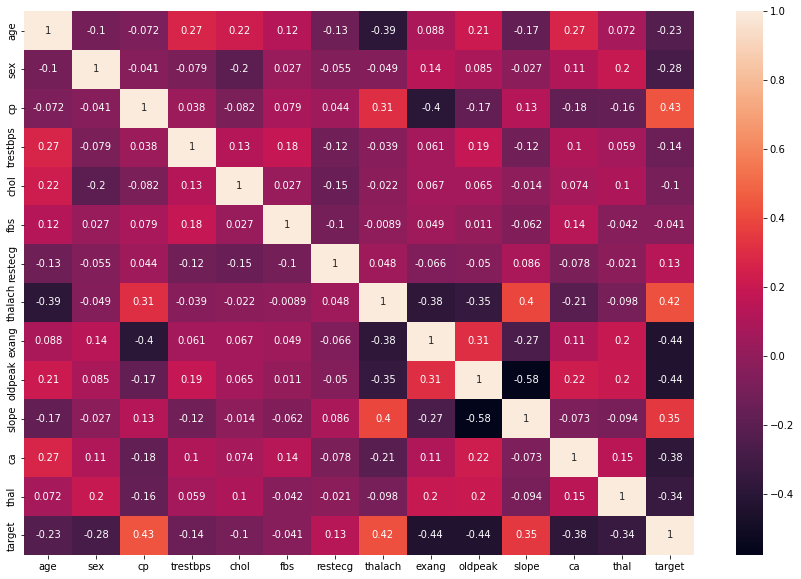

<Figure size 432x288 with 0 Axes>

In [31]:

plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()
plt.savefig("correlation figure")


C:\Users\lenovo\AppData\Local\Temp\ipykernel_2596\1008906589.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataset.hist(ax=ax)


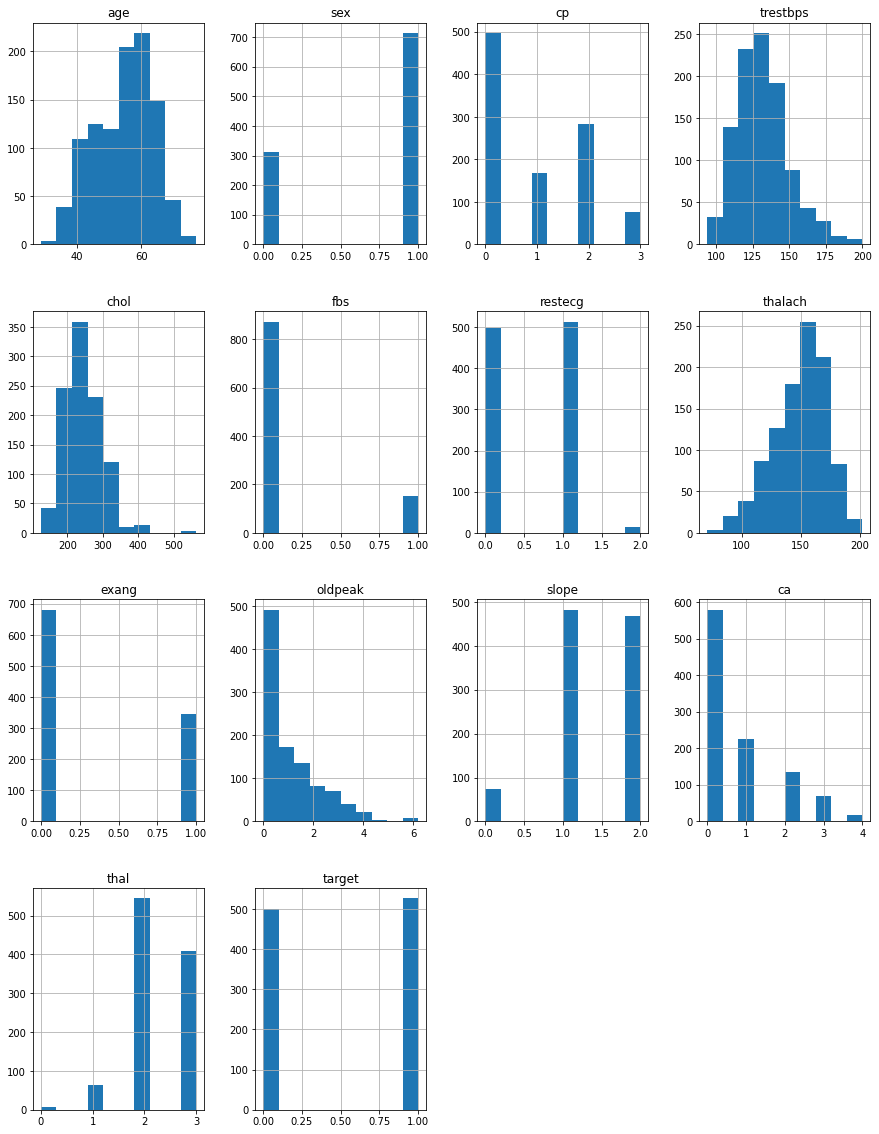

In [32]:
# visualize the all dataset
fig=plt.figure(figsize=(15,20))
ax=fig.gca()
dataset.hist(ax=ax)
plt.show()

C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


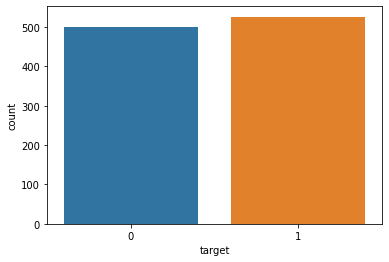

In [12]:
#visualize the count
sns.countplot(dataset['target'])
plt.show()

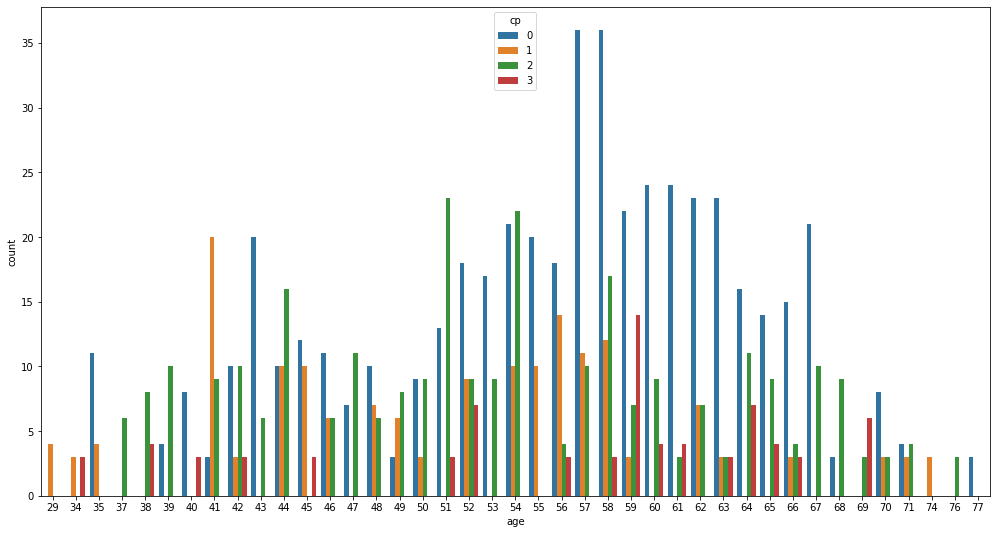

In [39]:
# occurance of cvd across age
plt.figure(figsize=(17,9))
sns.countplot(x='age',data=dataset,hue='cp')
plt.show()

<Figure size 1440x720 with 0 Axes>

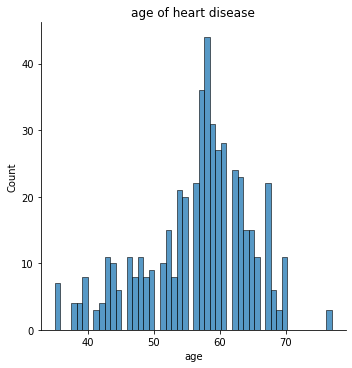

In [51]:
#occurance of cvd across age
plt.figure(figsize=(20,10))
sns.displot(dataset[dataset['target']==0]['age'],kde=False,bins=50)
plt.title('age of heart disease')
plt.show()

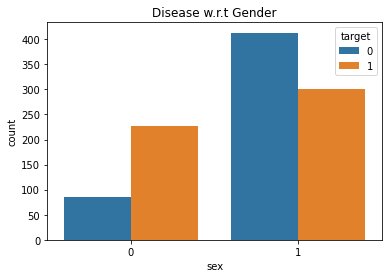

In [48]:
#patients w.r.t gender
sns.countplot(data=dataset,x='sex',hue='target')
plt.title('Disease w.r.t Gender')
plt.show()

<Figure size 1440x720 with 0 Axes>

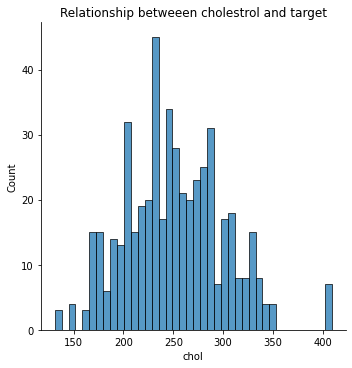

In [52]:
#Relationship between cholestrol and target
plt.figure(figsize=(20,10))
sns.displot(dataset[dataset['target']==0]['chol'],kde=False,bins=40)
plt.title('Relationship betweeen cholestrol and target')
plt.show()

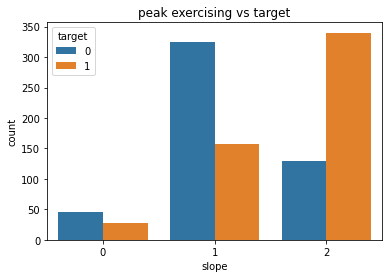

In [17]:
#relationship between peak exercising(slope)and target
sns.countplot(data=dataset,x='slope',hue='target')
plt.title('peak exercising vs target')
plt.show()

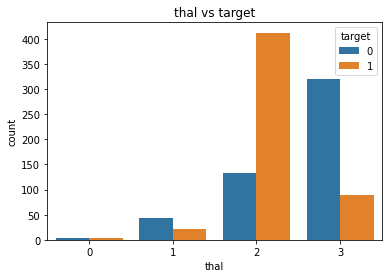

In [18]:
#thalassemia relationship with the heart disease
sns.countplot(data=dataset,x='thal',hue='target')
plt.title('thal vs target')
plt.show()

In [19]:
# spliting the features and the target
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,13].values
print(x)
print(y)

[[52.  1.  0. ...  2.  2.  3.]
 [53.  1.  0. ...  0.  0.  3.]
 [70.  1.  0. ...  0.  0.  3.]
 ...
 [47.  1.  0. ...  1.  1.  2.]
 [50.  0.  0. ...  2.  0.  2.]
 [54.  1.  0. ...  1.  1.  3.]]
[0 0 0 ... 0 1 0]


In [20]:
# spliting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(1025, 13) (820, 13) (205, 13)
(1025,) (820,) (205,)


In [21]:
# MODEL TRAINING 
# logistic regression model with training data
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
# training the logistic regression model with training data
model.fit(x_train,y_train)


C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
#model evaluation 
#accuracy score
#accuracy on training data
x_train_prediction=model.predict(x_train)

In [23]:
from sklearn.metrics import accuracy_score
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [24]:
print("accuracy on training data:",training_data_accuracy)

accuracy on training data: 0.8621951219512195


In [25]:
# predicting the test set result
y_pred=model.predict(x_test)
print(y_pred)

[1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1]


confusion matrix:
 [[ 77  21]
 [  7 100]]


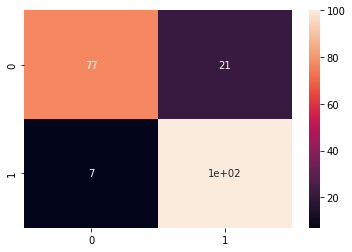

In [26]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print("confusion matrix:\n",cm)
plt.show()

In [27]:
# accuracy on the test data
x_test_prediction=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print("accuracy an testing data:",test_data_accuracy)

accuracy an testing data: 0.8634146341463415


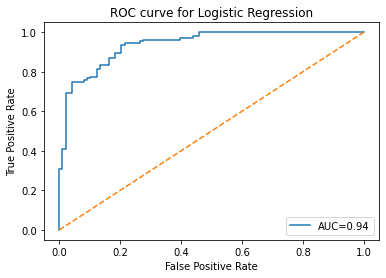

In [28]:
#Plotting the ROC curve
prob_lr=model.predict_proba(x_test)
auc_lr=roc_auc_score(y_test,prob_lr[:,1])
fprlr,tprlr,_=roc_curve(y_test,prob_lr[:,1])
roc_arc=auc(fprlr,tprlr)
plt.plot(fprlr,tprlr,label="AUC=%.2f"%auc_lr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for Logistic Regression")
plt.plot([0,1],[0,1],"--")
plt.legend()
plt.show()

In [29]:
#building a predictive system
age=int(input("enter the age of the person:"))
gender=int(input("enter the gender of peson either 0 or 1(0=female;1=male):"))
cp=int(input("enter the chest pain value either 0,1,2,3 where 0=typical angina;1=atypical angina;2=non -anginal pain;3=asympotatic:"))
trestbps=int(input('enter the value of person resting blood pressure in(mm Hg):'))
chol=int(input("enter the value of cholestrol in mg/al:"))
fbs=int(input('enter the value of person fasting blood sugar(>120mg/dl,1=true;0=false):'))
restecg=int(input('enter the value of resting electrocardiography measurement:'))
thalach=int(input('enter the value of thalach:'))
exang=int(input('enter the value of induced angina(1=yes;0=no):'))  
oldpeak=int(input('enter the value of old peak:'))   
slope=int(input('enter the value of slope of the peak ecercise ST segment(0=unsloping,1=flat,2= downslopping):'))
ca=int(input('enter the value of number of major vessels(0-4):'))
thal=int(input('enter the value of thalassemia(3=normal;6=fixed defect;7=reverseable defect):'))



enter the age of the person:61
enter the gender of peson either 0 or 1(0=female;1=male):1
enter the chest pain value either 0,1,2,3 where 0=typical angina;1=atypical angina;2=non -anginal pain;3=asympotatic:1
enter the value of person resting blood pressure in(mm Hg):148
enter the value of cholestrol in mg/al:203
enter the value of person fasting blood sugar(>120mg/dl,1=true;0=false):0
enter the value of resting electrocardiography measurement:1
enter the value of thalach:161
enter the value of induced angina(1=yes;0=no):1
enter the value of old peak:0
enter the value of slope of the peak ecercise ST segment(0=unsloping,1=flat,2= downslopping):2
enter the value of number of major vessels(0-4):0
enter the value of thalassemia(3=normal;6=fixed defect;7=reverseable defect):3


In [30]:
#passing all the values into a single tuple
input_data=(age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal)

#change the input data to na numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we as are predicting for only one instances
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print("MODEL PREDICTION IS",prediction)

if(prediction[0]==0):
    print("the person does not have heart disease")
else:
    print("the person has heart disease")

MODEL PREDICTION IS [1]
the person has heart disease
